# PCA - Classification - Decision Tree - Education_Attainment

Now we try a Decision Tree Classifier from sklearn on the same Internat Usage Education Attainment data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [4]:
# Import feature subset with Education_Attainment Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
import sys
sys.path.append('../resources')
from w6support import plot_2d_class
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

originalDF = pd.read_csv('educationFeatureSubset.csv')
dfOHE = pd.read_csv('oheTransformedData.csv')
dfOHE['Education_Attainment'] = pd.Series(originalDF['Education_Attainment'], index=dfOHE.index)
dfOHE.fillna(0, inplace=True)

# Next we check the Education_Attainment options in the dataset for use with classification
print(dfOHE.Education_Attainment.unique())

# Now we replace those values with integers for use with the classification algorithm
education_values = {"Education_Attainment": {"Masters": 1, "Some_College": 2, "College": 3, "High_School": 4, "Professional": 5, "Grammar": 6, "Special": 7, "Doctoral": 8, "Other": 9}}
dfOHE.replace(education_values, inplace=True)

X, y = dfOHE.loc[:, dfOHE.columns != 'Education_Attainment'], dfOHE['Education_Attainment']

predNames = list(dfOHE.columns[dfOHE.columns != 'Education_Attainment'])

['Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other']


## PCA Transformation

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

# Now we should split our data into a training set and a test set in order to properly assess our model using PCA
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [17]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(Xtrain)
Xtrain = pca_model.transform(Xtrain)
Xtest = pca_model.transform(Xtest)

# 2-Dimensions
Xtrain[:5]

array([[-0.35529674, -0.5327504 ],
       [-0.1912675 , -0.47005044],
       [-0.52157889, -0.55681204],
       [-0.54437412,  0.61908668],
       [ 0.80611043,  0.82767697]])

In [18]:
#from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Derive Xtrain2, which is the 
XtrainDf = pd.DataFrame(data=Xtrain, columns=predNames)
c1 = 'Age'
c2 = 'Not_Purchasing_Prefer_people'
colNames = [c1, c2]
Xtrain2 = XtrainDf[colNames]
nTrain = Xtrain2.shape[0]

XtestDf = pd.DataFrame(data=Xtest, columns=predNames)
Xtest2 = XtestDf[colNames]
Xcombined2 = pd.concat([Xtrain2, Xtest2])
ycombined = np.hstack((ytrain, ytest))


ValueError: Shape of passed values is (2, 7581), indices imply (14, 7581)

We also look at comparing different decision trees to the `Age` $\times$ `Not_Purchasing_Prefer_people` data, based on the following conditions

1. maximum tree depth (2,3,4,5)
2. choice of tree impurity algorithm (`gini` or `entropy`)

which is 8 combinations in all.

Plotting pic/depth_2_gini_decisionTree_Occupation_Age_NotPurchasingPreferPeople.pdf
0.3620894341115948
[[  0   0 347   3   0   0   0   0   0]
 [  0 179 639  11   0   0   0   0   0]
 [  0  20 697   6   0   0   0   0   0]
 [  0  62 196  39   0   0   0   0   0]
 [  0   0  71   0   0   0   0   0   0]
 [  0   5  10  33   0   0   0   0   0]
 [  0   3 113   1   0   0   0   0   0]
 [  0   0  62   2   0   0   0   0   0]
 [  0   0  24   4   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.665     0.216     0.326       829
           3      0.323     0.964     0.484       723
           4      0.394     0.131     0.197       297
           5      0.000     0.000     0.000        71
           6      0.000     0.000     0.000        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3620894341115948
[[  0   0 347   3   0   0   0   0   0]
 [  0 179 639  11   0   0   0   0   0]
 [  0  20 697   6   0   0   0   0   0]
 [  0  62 196  39   0   0   0   0   0]
 [  0   0  71   0   0   0   0   0   0]
 [  0   5  10  33   0   0   0   0   0]
 [  0   3 113   1   0   0   0   0   0]
 [  0   0  62   2   0   0   0   0   0]
 [  0   0  24   4   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.665     0.216     0.326       829
           3      0.323     0.964     0.484       723
           4      0.394     0.131     0.197       297
           5      0.000     0.000     0.000        71
           6      0.000     0.000     0.000        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.362     0.362     0.362      2527
   macro avg      0.154     0.146

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3656509695290859
[[  0 288  62   0   0   0   0   0   0]
 [  0 690 134   0   0   5   0   0   0]
 [  0 520 202   0   0   1   0   0   0]
 [  0 230  32   0   0  35   0   0   0]
 [  0  57  14   0   0   0   0   0   0]
 [  0  16   0   0   0  32   0   0   0]
 [  0 100  17   0   0   0   0   0   0]
 [  0  61   3   0   0   0   0   0   0]
 [  0  23   2   0   0   3   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.348     0.832     0.490       829
           3      0.433     0.279     0.340       723
           4      0.000     0.000     0.000       297
           5      0.000     0.000     0.000        71
           6      0.421     0.667     0.516        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.366     0.366     0.366      2527
   macro avg      0.134     0.198

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.37870993272655323
[[  0 213 137   0   0   0   0   0   0]
 [  0 598 226   0   0   5   0   0   0]
 [  0 395 327   0   0   1   0   0   0]
 [  0 198  64   0   0  35   0   0   0]
 [  0  48  23   0   0   0   0   0   0]
 [  0  14   2   0   0  32   0   0   0]
 [  0  81  36   0   0   0   0   0   0]
 [  0  53  11   0   0   0   0   0   0]
 [  0  18   7   0   0   3   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.370     0.721     0.489       829
           3      0.393     0.452     0.420       723
           4      0.000     0.000     0.000       297
           5      0.000     0.000     0.000        71
           6      0.421     0.667     0.516        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.379     0.379     0.379      2527
   macro avg      0.131     0.20

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3810842896715473
[[  0 124 226   0   0   0   0   0   0]
 [  0 426 398   5   0   0   0   0   0]
 [  0 228 494   0   0   1   0   0   0]
 [  0 147 115  18   0  17   0   0   0]
 [  0  25  46   0   0   0   0   0   0]
 [  0  10   6   7   0  25   0   0   0]
 [  0  45  72   0   0   0   0   0   0]
 [  0  41  23   0   0   0   0   0   0]
 [  0   8  17   1   0   2   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.404     0.514     0.452       829
           3      0.354     0.683     0.466       723
           4      0.581     0.061     0.110       297
           5      0.000     0.000     0.000        71
           6      0.556     0.521     0.538        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.381     0.381     0.381      2527
   macro avg      0.210     0.198

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.38306292045904233
[[  0 213 137   0   0   0   0   0   0]
 [  0 598 226   5   0   0   0   0   0]
 [  0 395 327   0   0   1   0   0   0]
 [  0 198  64  18   0  17   0   0   0]
 [  0  48  23   0   0   0   0   0   0]
 [  0  14   2   7   0  25   0   0   0]
 [  0  81  36   0   0   0   0   0   0]
 [  0  53  11   0   0   0   0   0   0]
 [  0  18   7   1   0   2   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.370     0.721     0.489       829
           3      0.393     0.452     0.420       723
           4      0.581     0.061     0.110       297
           5      0.000     0.000     0.000        71
           6      0.556     0.521     0.538        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.383     0.383     0.383      2527
   macro avg      0.211     0.19

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3810842896715473
[[  0 124 226   0   0   0   0   0   0]
 [  0 426 398   5   0   0   0   0   0]
 [  0 228 494   0   0   1   0   0   0]
 [  0 147 115  18   0  17   0   0   0]
 [  0  25  46   0   0   0   0   0   0]
 [  0  10   6   7   0  25   0   0   0]
 [  0  45  72   0   0   0   0   0   0]
 [  0  41  23   0   0   0   0   0   0]
 [  0   8  17   1   0   2   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.404     0.514     0.452       829
           3      0.354     0.683     0.466       723
           4      0.581     0.061     0.110       297
           5      0.000     0.000     0.000        71
           6      0.556     0.521     0.538        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.381     0.381     0.381      2527
   macro avg      0.210     0.198

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3842500989315394
[[  0 201 149   0   0   0   0   0   0]
 [  0 580 244   5   0   0   0   0   0]
 [  0 374 348   0   0   1   0   0   0]
 [  0 195  67  18   0  17   0   0   0]
 [  0  46  25   0   0   0   0   0   0]
 [  0  14   2   7   0  25   0   0   0]
 [  0  77  40   0   0   0   0   0   0]
 [  0  52  12   0   0   0   0   0   0]
 [  0  16   9   1   0   2   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       350
           2      0.373     0.700     0.487       829
           3      0.388     0.481     0.430       723
           4      0.581     0.061     0.110       297
           5      0.000     0.000     0.000        71
           6      0.556     0.521     0.538        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.384     0.384     0.384      2527
   macro avg      0.211     0.196

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


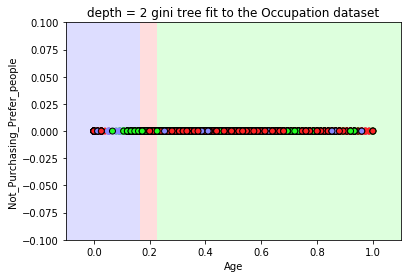

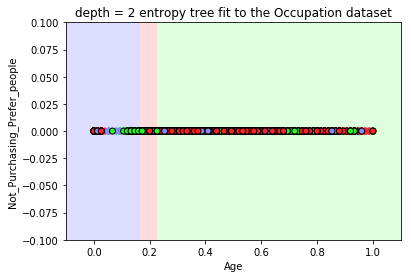

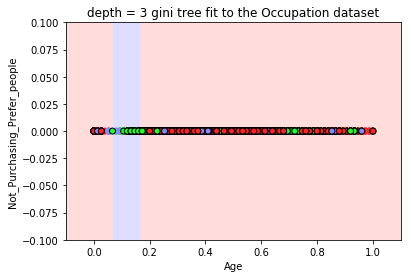

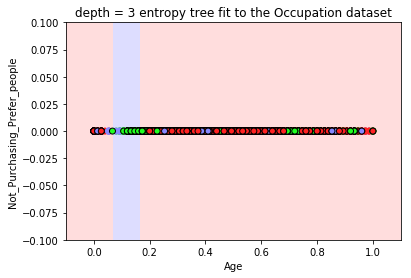

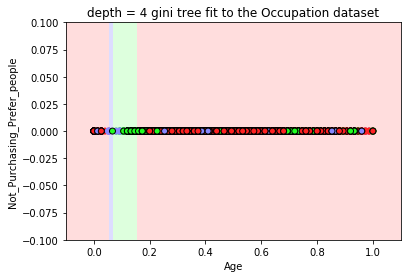

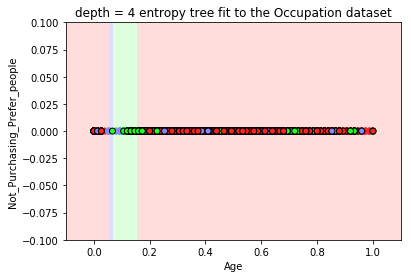

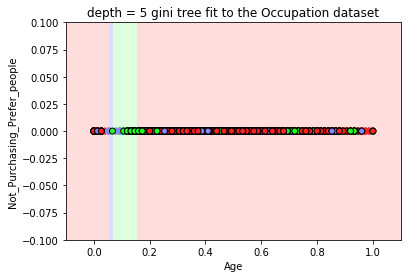

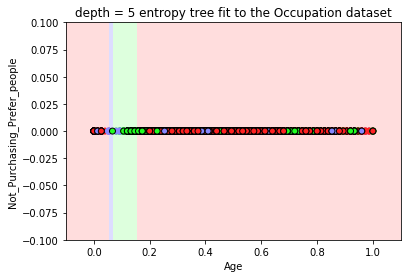

In [11]:
# Create color maps for 3-class classification problem
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

pattern = re.compile('[\W_]+', re.UNICODE)

c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
c2 = pattern.sub("",c2.title())

for treeDepth in range(2,6):
  for criterion in ["gini","entropy"]:
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
    tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)

    tree2.fit(Xtrain2, ytrain)

    plotTitle = "depth = %i %s %s fit to the %s dataset" % (treeDepth, criterion, "tree", "Occupation")
    fileTitle = "pic/depth_%i_%s_%s_%s_%s_%s.pdf" % (treeDepth, criterion, "decisionTree", "Occupation", c1, c2)

    print("Plotting "+fileTitle)
    plot_2d_class(Xcombined2, ycombined, nTrain, tree2, plotTitle, fileTitle, cmap_light, cmap_bold)

    ytree2 = tree2.predict(Xtest2)
    print(accuracy_score(ytest, ytree2))
    print(confusion_matrix(ytest, ytree2))
    print(classification_report(ytest, ytree2, digits=3))

We include all features below

In [13]:
criterion = "entropy"
treeDepth = 8
tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
tree.fit(Xtrain, ytrain)
y_treeTest = tree.predict(Xtest)
print(accuracy_score(ytest, y_treeTest))
print(confusion_matrix(ytest, y_treeTest))
print(classification_report(ytest, y_treeTest, digits=3))

0.4147210130589632
[[ 12 105 233   0   0   0   0   0   0]
 [  7 549 254  19   0   0   0   0   0]
 [ 17 278 424   3   0   0   0   1   0]
 [  1 188  54  41   0  12   0   0   1]
 [  1  30  40   0   0   0   0   0   0]
 [  2   9   5  10   0  22   0   0   0]
 [  1  88  27   1   0   0   0   0   0]
 [ 10  23  31   0   0   0   0   0   0]
 [  2  10  13   2   0   1   0   0   0]]
              precision    recall  f1-score   support

           1      0.226     0.034     0.060       350
           2      0.429     0.662     0.521       829
           3      0.392     0.586     0.470       723
           4      0.539     0.138     0.220       297
           5      0.000     0.000     0.000        71
           6      0.629     0.458     0.530        48
           7      0.000     0.000     0.000       117
           8      0.000     0.000     0.000        64
           9      0.000     0.000     0.000        28

   micro avg      0.415     0.415     0.415      2527
   macro avg      0.246     0.209

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


One of the main advantages of decision trees is the fact that they provide easily interpreted models for prediction. Indeed, the rules encoded in the tree can help to understand how the predictors combine and contribute to explaining the classification. As such, decision trees are often described as _white box_, where other algorithms (in particular, neural networks) are best seen as _black box_.

To aid interpretation, `scikit-learn` can output the model in a graph description language such as [dot](https://www.graphviz.org/pdf/dotguide.pdf) using the `export_graphviz` method. If you wish, you can export the `dot` file and process it using tools, both command line such as [dotty](https://www.graphviz.org/pdf/dottyguide.pdf) and more general tools such as those listed [here](https://en.wikipedia.org/wiki/Graphviz). However, it is probably more convenient to use a `dot` postprocessor (`pydotplus`) directly from within the notebook to create an object that can be displayed in the notebook, or saved to a file as below.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.753888 to fit



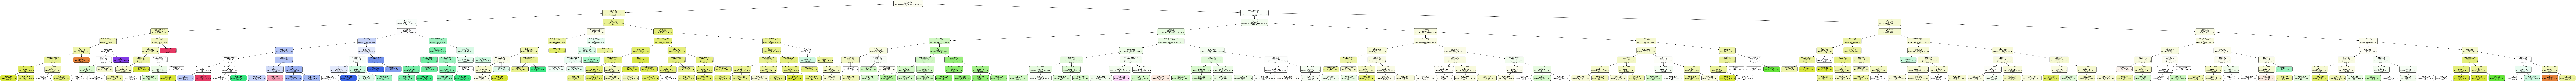

True

In [14]:
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn.tree import export_graphviz
        
dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=predNames,  
    # the parameters below are new in sklearn 0.18
    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
graph.write_pdf("pic/tree.pdf")
